# Text Classification with Pandas + Sci-kit 



The field of Natural Language Processing (NLP) is one of the booming areas of Artificial Intelligence. It deals with the understanding of language, something very intimate to humans, and promises to deliver some of the most needed features for an AGI (Artificial General Intelligence) be possible. Nowadays though, its application is not restricted to academic research only, for many IT giants such as Amazon and Netflix are using extensively techniques from this field. As the field evolves, it is becoming more accessible for enterprises and even personal business to benefit from the exciting advances this field got in the last years.

There are many interesting tasks that NLP address, with most known ones being Document Classification, sentiment analyses, natural language generation, among others. These tasks can be modeled as a multitude of problems, such as spam mail filtering, user review filtering, user review sentiment analyze, chatbots for answering questions and interacting with a user, and many others.

In this tutorial, we introduce one of most common NLP and Text Mining tasks, that of Document Classification. Note that while being common, it is far from useless, as the problem of classifying content is a constant hurdle we humans face every day. It is important to know basic elements of this problem since many of it can be used for other tasks such as sentiment analysis.

We will be playing with a real-world problem, that of document classification of the Amazon reviews dataset. This dataset has reviews for many categories from the Amazon website, along with information of these reviews, such as usefulness and score of the product being reviewed. We will train and try to classify reviews from different categories.

The pre-requisites for this tutorial is just some basic knowledgde of python programming. At the end of it we will be able to perform basic text classification.


Tutorial contents:<br>
    - Data loading and visualization.
    - Text pre-processing.
    - Classification.

# Data loading and visualization.

The Amazon review dataset has a large corpus of reviews ranging from 10mb to 10gb, from diverse categories such as automobile-related to musical-instrument-related. To load these datasets we will install and introduce the pandas library.  

### Pandas Library

The Pandas library is the standard API for dealing with data. Data is all information we have around, information that we consider of interest. Data can be numeric or textual. For our tasks of classifying text, what matters for us is mostly data in text form. Pandas give us tools to handle small to large text bodies, the main one being a *dataframe*. <br>

*Dataframes* are object-based structures for data storage and manipulation. Through its methods, we can do many operations to the data. Common ones are to filter the data into smaller sets, to add new data or dataframes to it, and perform data exchanges with other dataframes. We will explore some of these operations soon. <br>
Lastly, Pandas has a good and up-to-date documentation, so we recommend you guys to check it out. Just a ``` pip install pandas``` is enough to install it and its dependencies. <br>
Now we just need to import the library with the command:

In [ ]:
import pandas as pd

To download the datasets we will be working on, check this link: http://jmcauley.ucsd.edu/data/amazon/ . For this tutorial, we will explore subsets of the following datasets: 
    - The Amazon Instant Video Dataset
    - The Automotive Dataset
    - The Musical Instruments Dataset
    - The Office Product Dataset
    - The Patio Lawn and Garden Dataset
    
To load them in dataframes the website provides us with the following functions:

In [1]:
import gzip

def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def getDF(path): 
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

These functions read the downloaded datasets and return them encapsulated in the pandas dataframe. We use them to load the 5 datasets (they need to be in the same folder as this script) into dataframes: 

In [2]:
video_data = getDF('reviews_Amazon_Instant_Video_5.json.gz')
automotive_data = getDF('reviews_Automotive_5.json.gz')
musical_data = getDF('reviews_Musical_Instruments_5.json.gz')
office_data = getDF('reviews_Office_Products_5.json.gz')
patio_data = getDF('reviews_Patio_Lawn_and_Garden_5.json.gz')

For this tutorial though, we will work only with the first thousand reviews from each of the categories. We see this number as significant for an introduction since it does not need too much ram memory for processing. The following code shows this process:

In [3]:
frames = [video_data.reviewText[:1000],automotive_data.reviewText[:1000], \
          musical_data.reviewText[:1000],office_data.reviewText[:1000],\
          patio_data.reviewText[:1000]]
complete_data = pd.concat(frames, keys = ['video','auto','musical','office','patio'])

All the review text up to 1000 from each dataframe is stored in the frames list. In the last line, these dataframes are concatenated to one only, being set a key to identify each of the datasets. <br>
Lastly, we create labels for each review in the dataframe corresponding to its category (0,1,2,3,4). 
We finish by cleaning the loaded dataframes, since we already extracted the firsts thousands we will work on.

In [4]:
labels = []
for i in range(5):
    labels += [i] * 1000
video_data,automotive_data,musical_data,office_data,patio_data = [],[],[],[],[]

You can check the datasets through the keys defined in the concatenation process. For that, we use the location method of pandas, *loc*. By defining the key, we have access to only those reviews of the corresponding category. You can print and check its output. 

In [8]:
print(complete_data.loc['video'])

0      I had big expectations because I love English ...
1      I highly recommend this series. It is a must f...
2      This one is a real snoozer. Don't believe anyt...
3      Mysteries are interesting.  The tension betwee...
4      This show always is excellent, as far as briti...
5      I discovered this series quite by accident. Ha...
6      It beats watching a blank screen. However, I j...
7      There are many episodes in this series, so I p...
8      This is the best of the best comedy Stand-up. ...
9      Not bad.  Didn't know any of the comedians but...
10     Funny, interesting, a great way to pass time. ...
11     I love the variety of comics.  Great for dinne...
12     comedy is a matter of taste. this guy was a li...
13     if this had to do with Dat Phan, he was hilari...
14     Watched it for Kevin Hart and only Kevin Hart!...
15     he's OK. His humor consists mainly of varying ...
16     some comedians are very good, some not so good...
17     I only watched the Wanda

If you want to define and see a range of reviews, python operator for lists ':' works just fine: 

In [12]:
print(complete_data.loc['video'][0:5])

0    I had big expectations because I love English ...
1    I highly recommend this series. It is a must f...
2    This one is a real snoozer. Don't believe anyt...
3    Mysteries are interesting.  The tension betwee...
4    This show always is excellent, as far as briti...
Name: reviewText, dtype: object


For individual evaluation of reviews, you just need to explicit the index. As an example we see the first review in the video category:

In [21]:
print(complete_data.loc['video'][0])

"I had big expectations because I love English TV, in particular Investigative and detective stuff but this guy is really boring. It didn't appeal to me at all."

As we have seen, individual evaluation is handy for learning individual opinions in the reviews. But to learn overall opinions we would need to check every one of the thousand reviews of each category, what is a little hard to do. Luckily there are handy tools that can process large bodies of text, and give us some insight into the general opinion of the customers. We will explore here one library, the *wordcloud*

### WordCloud

When dealing with datasets containing many words, it is important to have some statistical analysis, so we understand better the problem we have in our hands. Tagcloud or WorldCloud is a technique that was very popular on blogs/websites that showed the most popular tags that the viewers accessed. Nodaway it has regained life in text analysis, where we can gain insight by checking the most frequent words from texts. <br>
For our datasets we will use the word_cloud library so that we can visualize the most common words from the categories. We convert each dataset to a string containing all reviews from its category and feed them to the word_cloud, that will calculate the frequency of the words. <br>
To plot the graphics, word_cloud needs matplotlib and Pillow installed. The libraries can be installed with:<br>
```pip install wordcloud``` <br>
```pip install matplotlib``` <br>
```pip install Pillow``` <br>
They will install the libraries and the dependencies. In the following code we loop through the datasets outputting the word_cloud of word frequencies:

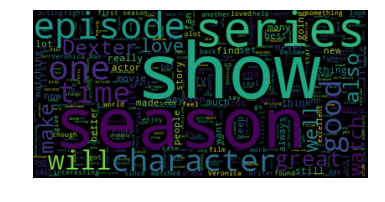

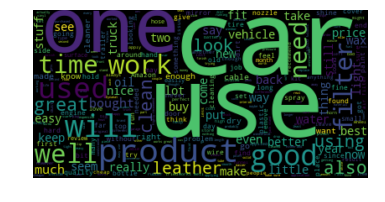

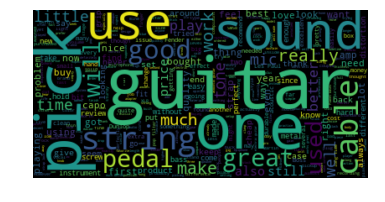

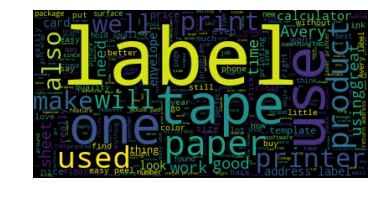

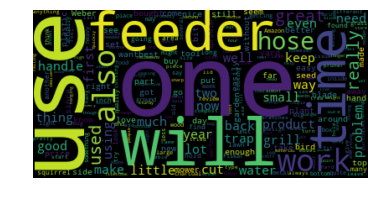

In [14]:
from wordcloud import WordCloud
import PIL
import itertools
import matplotlib.pyplot as plt


reviews_names = ['video','auto','musical','office','patio']
for reviews,name in zip(frames,reviews_names):
    raw_str = complete_data.loc[name].str.cat(sep=',')
    wordcloud = WordCloud( max_words=1000,margin=0).generate(raw_str)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

We observe that for all categories there are some frequent words that represent them. For example, we see many related words such as 'season', 'show', and 'character' for the video category. For the automobile category there is 'car', and for the musical category, there is 'guitar','sound', 'string', etc. 

We see too that the words 'use', 'used', 'one', 'will' and others are frequents, while not being too much representing of the datasets. Some or all of these words can be removed if deemed necessary, through the use of stop words, explained in the next section.  

We recommend that you guys try other methods from the word_cloud library, to gain additional insights about the datasets. Check the website http://amueller.github.io/word_cloud/

# Preprocessing

Before using the dataset for learning methods, there is the need to preprocess it by removing words that do not help in the classification process. These words are called **stopwords**, and they are most common function words such as 'is', 'the', 'that', or punctuation. We usually use a list of **stopwords** already collected by someone, and in our case, we use the NLTK stopwords list with 153 items. There isn't a perfect stopword list, in many cases, one has to manually create one. The stopword list we choose is small compared to many others out there, but it contains the most common words that might prejudice in the classification later. We can also extend the stopword list with the words we do not agree to be characteristic of the category in the word_cloud, though one needs to be cautious about it.

In [16]:
stop_words =['i','me','my','myself','we','our','ours','ourselves','you','your','yours','yourself',
            'yourselves','he','him','his','himself','she','her','hers','herself','it','its','itself',
            'they','them','their','theirs','themselves','what','which','who','whom','this','that',
            'these','those','am','is','are','was','were','be','been','being','have','has','had',
            'having','do','does','did','doing','a','an','the','and','but','if','or','because','as',
            'until','while','of','at','by','for','with','about','against','between','into','through',
            'during','before','after','above','below','to','from','up','down','in','out','on','off',
            'over','under','again','further','then','once','here','there','when','where','why','how',
            'all','any','both','each','few','more','most','other','some','such','no','nor','not',
            'only','own','same','so','than','too','very','s','t','can','will','just','don','should',
            'now','uses','use','using','used','one','also']

We added the words 'uses','use','using','used','one','also' to the list, as they don't seem to too much of help in the document classification context, where we need words more unique to each category. 

The preprocess function is defined next, and its objective is to prepare the data for the classification task. We enforce all words to be in lowercase, remove the ones containing punctuation, and filter the **stopwords**. We also do the *tokenization* process, where all text is divided into parts (words normally). We return these tokens of each dataset bundled together in a list. 

In [21]:
import re
def preprocess(data):
    reviews_tokens = []
    for review in data:
        review = review.lower() #Convert to lower-case words
        raw_word_tokens = re.findall(r'(?:\w+)', review,flags = re.UNICODE) #remove pontuaction
        word_tokens = [w for w in raw_word_tokens if not w in stop_words] # do not add stop words
        reviews_tokens.append(word_tokens)
    return reviews_tokens #return all tokens

We can now check how the datasets are again in the word_cloud:

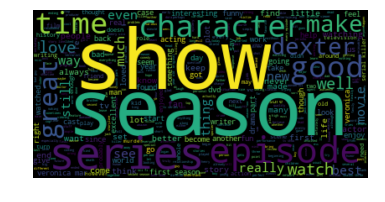

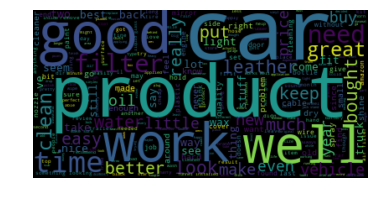

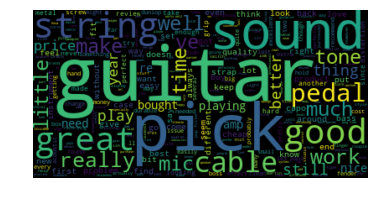

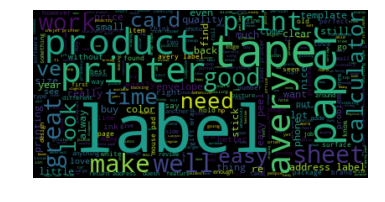

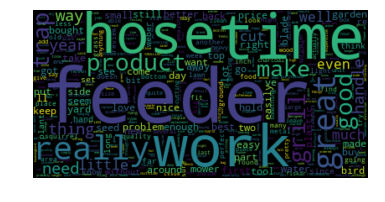

In [22]:
import itertools

reviews_names = ['video','automotive','musical','office','patio']
for reviews,name in zip(frames,reviews_names):
    tokenized_reviews = preprocess(reviews) #apply the preprocess step
    reviews = list(itertools.chain(*tokenized_reviews))
    text_reviews = " ".join(reviews)
    wordcloud = WordCloud( max_words=1000,margin=0).generate(text_reviews)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    #image = wordcloud.to_image()
    #image.show()
    #image.save(name+'.bmp')

# Classification

For the classification step, it is really hard and inappropriate to just feed a list of tokens with thousand words to the classification model. So, before the classification, we need to transform the tokens dataset to more compress and understandable information for the model. This process is called featurization or feature extraction. We choose the method of BoW(Bag of Words) for this end.

BoW is a simple but effective method for feature extraction. To understand it we explain the essential notion: The set of reviews/texts from one user is known as '*document*', and we define as '*vocabulary*' the set of all distinct words from all reviews texts of all categories. The BoW model then computes a feature vector with the size of the vocabulary, containing the words frequency for its corresponding document. A simple illustration of document, vocabulary, and features vectors is as follow:

    - document d1 = ['dog', 'eats', 'meat']
    - document d2 = ['cat', 'eats', 'fish']
    
The vocabulary will be:
    - vocabulary = {'dog','cat','eats','meat','fish'}
and the features for each documents are:
    - features f1 = [1, 0, 1, 1, 0]
    - features f2 = [0, 1, 1, 0, 1] 
    

So in f1, we have the first, third and fourth elements from the dictionary active (dog, eats and meat respectively). To be able to extract features from the documents, the Bow model just has to be a  dictionary that saves the indexes of the vocabulary, so we know which position values in the feature vector we need to increment. The BoW for the last example would be :<br>

    - {'dog':0 , 'cat':1, 'eats':2, 'meat':3, 'fish':4}
    
The code for building a basic Bow model is shown as:

In [ ]:
def construct_bag_of_words(data):
    corpus = preprocess(data)
    bag_of_words = {}
    word_count = 0
    for sentence in corpus:
        for word in sentence:
            if word not in bag_of_words: # do not allow repetitions
                bag_of_words[word] = word_count #set indexes
                word_count+=1
            
    #print(dict(Counter(bag_of_words).most_common(5)))
    return bag_of_words #index of letters

bag_of_words = construct_bag_of_words(complete_data)

So, to extract a feature vector from one of the tokens we got in the preprocessing step, we need to allocate a list with the size of the vocabulary (that is the size of the BoW dictionary), and increment the positions our BoW model gives to us.

In [ ]:
def featurize(sentence_tokens,bag_of_words):
    sentence_features = [0 for x in range(len(bag_of_words))]

    for word in sentence_tokens:
        index = bag_of_words[word]
        sentence_features[index] +=1
    return sentence_features

So, the complete algorithm for extraction of features for all our data is described next. The preprocessing is applied to all data, and for each tokenized review, we featurize it and append to the batch. This process repeats till there are no more reviews text tokens.

In [ ]:
def get_batch_features(data,bag_of_words):
    batch_features = []
    reviews_text_tokens = preprocess(data)
    for review_text in reviews_text_tokens:
        feature_review_text = featurize(review_text,bag_of_words)
        batch_features.append(feature_review_text)
    return batch_features

batch_features = get_batch_features(complete_data,bag_of_words)

In the end we will work only with the batch of features for the classification step. For that, we make use of a handy library for text processing and NLP: Scikit learn. 

### Scikit learn 

Scikit is one of the standard tools for text processing, NLP, and Machine learning. It eases the development of NLP applications and has a plethora of Machine Learning models and tools. For this tutorial, we will train some basic models with the *fit* method, and test with the *predict* method.<br>

To install it just do ```pip install sklearn``` , it uses as dependencies the numpy and scipy libraries, that should be automatically installed together.

We divide the batch of features along with the created labels through the train_test_split, that give us a train and test set, along with the corresponding labels.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( batch_features, labels, test_size=0.33, random_state=42)

So we will use the train set to adjust our model through the fit method, and check the prediction accuracy soon after.

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import BernoulliNB, MultinomialNB

from time import time
from sklearn import metrics


clf = Perceptron(n_iter=50)
#clf = MultinomialNB(alpha=.01)

clf.fit(X_train, y_train)

pred = clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

We see that the classification model *Perceptron* give us an accuracy of 91%. Not bad at all, since we have fiddled little with parameters of the models.

Lastly we show the usefulness of the scikit library, by presenting the complete document classification code doing heavy use of this library.

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from time import time
from sklearn import metrics

from sklearn.model_selection import train_test_split

import pandas as pd
import gzip
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier



def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def getDF(path): 
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

video_data = getDF('reviews_Amazon_Instant_Video_5.json.gz')
automotive_data = getDF('reviews_Automotive_5.json.gz')
musical_data = getDF('reviews_Musical_Instruments_5.json.gz')
office_data = getDF('reviews_Office_Products_5.json.gz')
patio_data = getDF('reviews_Patio_Lawn_and_Garden_5.json.gz')

frames = [video_data.reviewText[:1000],automotive_data.reviewText[:1000], \
          musical_data.reviewText[:1000],office_data.reviewText[:1000],\
          patio_data.reviewText[:1000]]
complete_data = pd.concat(frames, keys = ['video','auto','musical','office','patio'])
labels = []
for i in range(5):
    labels += [i] * 1000
video_data,automotive_data,musical_data,office_data,patio_data = [],[],[],[],[]

X_train, X_test, y_train, y_test = train_test_split( complete_data, labels, test_size=0.33, random_state=42)
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, 
                                 stop_words='english') #apply prepreocessing and stopwords
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

#Uncomment to test others classifiers
#clf = Perceptron(n_iter=50)
#clf = BernoulliNB(alpha=.01)
clf = MultinomialNB(alpha=.01)
#clf = RandomForestClassifier()

print("n_samples: %d, n_features: %d" % X_train.shape)

clf.fit(X_train, y_train)
pred = clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

n_samples: 3350, n_features: 16587
accuracy:   0.946


The best results from the models we tried come from the Multinomial Naives Bayes method, resulting in 94,6% of accuracy. You guys can try other models to see if it can get a better result.

And that's all for now! We will in the future approach with more depth how to deal with bigger datasets for many NLP problems.